<a href="https://colab.research.google.com/github/fpaludi/DeepLearningDatitos/blob/master/Unidad2_Notas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch

In [25]:
x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [26]:
x.grad

$y = 2 \times x^2$


In [27]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

**we can automatically calculate the gradient of y with respect to each component of x] by calling the function for backpropagation and printing the gradient.**

In [28]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

$y' = 4 \times x$

# 

In [29]:
x.grad == 4 * x

tensor([True, True, True, True])

In [30]:
all(x.grad == 4 * x)

True

**Now let us calculate another function of `x`.**

In [31]:
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

## Backward for Non-Scalar Variables
Technically, when y is not a scalar, the most natural interpretation of the differentiation of a vector y with respect to a vector x is a matrix. For higher-order and higher-dimensional y and x, the differentiation result could be a high-order tensor.

However, while these more exotic objects do show up in advanced machine learning (including [in deep learning]), more often (when we are calling backward on a vector,) we are trying to calculate the derivatives of the loss functions for each constituent of a batch of training examples. Here, (our intent is) not to calculate the differentiation matrix but rather (the sum of the partial derivatives computed individually for each example) in the batch.

In [32]:
# Invoking `backward` on a non-scalar requires passing in a `gradient` argument
# which specifies the gradient of the differentiated function w.r.t `self`.
# In our case, we simply want to sum the partial derivatives, so passing
# in a gradient of ones is appropriate
x.grad.zero_()
y = x * x
# y.backward(torch.ones(len(x))) equivalent to the below
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

## Computing the Gradient of Python Control Flow
One benefit of using automatic differentiation is that [even if] building the computational graph of (a function required passing through a maze of Python control flow) (e.g., conditionals, loops, and arbitrary function calls), (we can still calculate the gradient of the resulting variable.) In the following snippet, note that the number of iterations of the while loop and the evaluation of the if statement both depend on the value of the input a.

In [33]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [34]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [35]:
a.grad == d / a

tensor(True)

In [36]:
a, a.grad, d

(tensor(1.0204, requires_grad=True),
 tensor(1024.),
 tensor(1044.8553, grad_fn=<MulBackward0>))

## N-th Derivative

In [37]:
from torch.autograd import grad


In [38]:
def nth_derivative(f, wrt, n):

    for i in range(n):
        grads = grad(f, wrt, create_graph=True)[0]
        f = grads.sum()

    return grads

In [39]:
x = torch.arange(4., requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [40]:
loss = (x ** 4).sum()
d_2nd = nth_derivative(f=loss, wrt=x, n=2)

In [41]:
d_2nd == x*x * 12

tensor([True, True, True, True])

In [42]:
d_2nd

tensor([  0.,  12.,  48., 108.], grad_fn=<MulBackward0>)

In [43]:
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [44]:
grads = grad(loss, x, create_graph=True)

In [45]:
grads[0]

tensor([  0.,   4.,  32., 108.], grad_fn=<MulBackward0>)

In [46]:
x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)
y.backward()
y.backward()
x.grad

RuntimeError: ignored

If graph is retained the gradients are accumulated

In [47]:
x = torch.arange(4.0, requires_grad=True)
y = 2 * torch.dot(x, x)
y.backward(retain_graph=True)
y.backward(retain_graph=True)
y.backward()

y, x.grad == 3 * (4 * x)

(tensor(28., grad_fn=<MulBackward0>), tensor([True, True, True, True]))

## Trigonometrics 

In [48]:
import matplotlib.pyplot as plt

In [49]:
x = torch.arange(0, 8, 0.1, requires_grad=True)
y = torch.sin(x).sum()
y.backward()
y, x.grad

(tensor(10.9508, grad_fn=<SumBackward0>),
 tensor([ 1.0000,  0.9950,  0.9801,  0.9553,  0.9211,  0.8776,  0.8253,  0.7648,
          0.6967,  0.6216,  0.5403,  0.4536,  0.3624,  0.2675,  0.1700,  0.0707,
         -0.0292, -0.1288, -0.2272, -0.3233, -0.4161, -0.5048, -0.5885, -0.6663,
         -0.7374, -0.8011, -0.8569, -0.9041, -0.9422, -0.9710, -0.9900, -0.9991,
         -0.9983, -0.9875, -0.9668, -0.9365, -0.8968, -0.8481, -0.7910, -0.7259,
         -0.6536, -0.5748, -0.4903, -0.4008, -0.3073, -0.2108, -0.1122, -0.0124,
          0.0875,  0.1865,  0.2837,  0.3780,  0.4685,  0.5544,  0.6347,  0.7087,
          0.7756,  0.8347,  0.8855,  0.9275,  0.9602,  0.9833,  0.9965,  0.9999,
          0.9932,  0.9766,  0.9502,  0.9144,  0.8694,  0.8157,  0.7539,  0.6845,
          0.6084,  0.5261,  0.4385,  0.3466,  0.2513,  0.1534,  0.0540, -0.0460]))

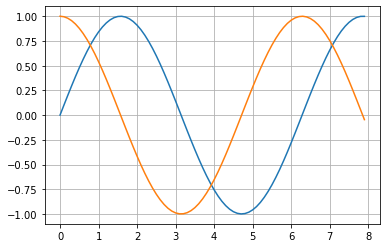

In [50]:
plt.plot(x.detach().numpy(), torch.sin(x).detach().numpy())
plt.plot(x.detach().numpy(), x.grad.detach().numpy())
plt.grid()